In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Random Regression using Sckit Learn

In [36]:
X, Y = make_regression(n_samples=500, n_features=1, noise=6.5)
print(X.shape)
print(Y.shape)

(500, 1)
(500,)


In [37]:
print(X[:5,:])

[[-0.63311049]
 [-0.16048794]
 [-1.36921744]
 [-0.27252414]
 [-0.34012289]]


In [38]:
print(Y[:5])

[-19.37952926 -19.7587892  -46.29838287  -0.20756584  -9.55455294]


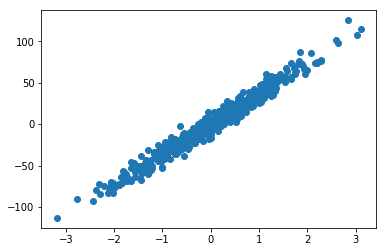

In [39]:
plt.scatter(X,Y)
plt.show()

In [40]:
split= int(0.8*X.shape[0]) # 0.8*500 = 400
print(split)

400


In [41]:
# Get Test and Train data, 80% for train and rest 20% for test
X_train = X[:split]
X_test = X[split:]
Y_train= Y[:split]
Y_test= Y[split:]

# Gradient Descent Algorithm
To minmise the error or parameter for low cost function we perform Gradient Descent algo
    1. Start with a random theta
    2. Repeat until converge
        i. Update Theta according to the rule       

In [45]:
class LinearRegression:
    
    def __init__(self, X_train, Y_train, epoch=100, lr=0.1):
        self.X_train = X_train
        self.Y_train = Y_train
        self.theta= np.zeros((2))
        self.epoch = epoch
        self.lr = lr
        self.mse_list= []
        
    
    # Helper functions
    # linear Regrassion equation
    def hypothesis (self, x):
        ''' hypothesis line equation function for yh predicted and theta is m and c "yh=mx+c" '''
        return (self.theta[0] + self.theta[1]*x)

    # Loss or Cost L2 (MSE or LSE) function () for optimizing our weights (m,c or theta[0], theta[1])
    def cost_function(self):
        m = self.X_train.shape[0]
        error = 0
        for i in range(m):
            yh= hypothesis(self.X_train[i],self.theta)
            error += (yh-self.Y_train[i])**2
        mean_sq_error = error/2*m
        return mean_sq_error

    #Gradient of linear equation means partial derivative wrt theta[1] i.e "m" and theta[1] i.e "c"
    # https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html
    def gradient(self):
        m= self.X_train.shape[0]
        grad = np.zeros((2,))
        for i in range(m):
            yh= hypothesis(self.X_train[i], self.theta)
            grad[0] += (yh - self.Y_train[i])
            grad[1] += (yh- self.Y_train[i])*self.X_train[i]
        grad[0] = grad[0]/m
        grad[1] = grad[1]/m
        return grad

    #To minimize MSE we use Gradient Descent to calculate the gradient of our cost function.
    def gradient_descent(self):
        #theta = np.array([0.0,0.0]) # random theta
        itr=0
        #mse_list = []
        theta_list = []
        while itr <= self.epoch:
            grad= gradient(self.X_train,self.Y_train,self.theta)
            mse = cost_function(self.X_train,self.Y_train,self.theta)
            self.mse_list.append(mse)
            theta_list.append((self.theta[0], self.theta[1]))
            self.theta[0] = self.theta[0] - grad[0]*self.lr
            self.theta[1] = self.theta[1] - grad[1]*self.lr
            itr += 1
        return self.theta, self.mse_list
    
    def fit(self):
        for _ in range (self.epoch):
            self.gradient_descent()

In [52]:
model = LinearRegression(X_train, Y_train, epoch=10, lr=0.1)
model.fit()

In [57]:
model.theta

array([2.75655163e-02, 3.63941794e+01])

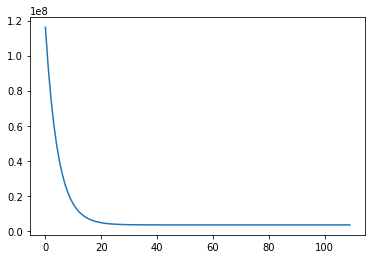

In [53]:
plt.plot(model.mse_list)
plt.show()

In [56]:
np.min(model.mse_list)

3354323.545125202

In [55]:
np.max(model.mse_list)

116184439.01691648

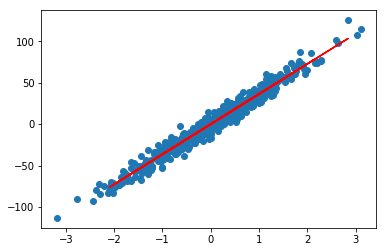

In [54]:
plt.scatter(X,Y)
Yp= hypothesis(X_test, model.theta)
plt.plot(X_test,Yp,color='red')
#plt.plot(X_test,Y_test, color='orange')
plt.show()

In [58]:
Yp[1]

array([49.3805376])

In [59]:
print(X_test[3])
print(Y_test[3])

[0.91488529]
34.33677081314383


In [60]:
yp= hypothesis(X_test[3],model.theta)
print(yp)

[33.32406504]
